## CAMELS Brazil

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_Br.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_Br.ipynb)


This notebook explores CAMELS Brazil dataset which was introduced in [VP Changas et al., 2020](
https://essd.copernicus.org/articles/12/2075/2020/). 

In [1]:
from ai4water.eda import EDA
from ai4water.datasets import CAMELS_BR
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CAMELS_BR(
    path=r"E:\data\gscad\CAMELS\CAMELS_BR"   # set path to None if you have not already downloaded data
)



    Not downloading the data since the directory 
    E:\data\gscad\CAMELS\CAMELS_BR already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
dataset.start

'19800101'

In [5]:
dataset.end

'20181231'

In [6]:
stations = dataset.stations()
len(stations)

593

### Static Data

In [7]:
dataset.static_features

['p_mean',
 'pet_mean',
 'et_mean',
 'aridity',
 'p_seasonality',
 'asynchronicity',
 'frac_snow',
 'high_prec_freq',
 'high_prec_dur',
 'high_prec_timing',
 'low_prec_freq',
 'low_prec_dur',
 'low_prec_timing',
 'geol_class_1st',
 'geol_class_1st_perc',
 'geol_class_2nd',
 'geol_class_2nd_perc',
 'carb_rocks_perc',
 'geol_porosity',
 'geol_permeability',
 'consumptive_use',
 'consumptive_use_perc',
 'reservoirs_vol',
 'regulation_degree',
 'q_mean',
 'runoff_ratio',
 'stream_elas',
 'slope_fdc',
 'baseflow_index',
 'hfd_mean',
 'Q5',
 'Q95',
 'high_q_freq',
 'high_q_dur',
 'low_q_freq',
 'low_q_dur',
 'zero_q_freq',
 'crop_perc',
 'crop_mosaic_perc',
 'forest_perc',
 'shrub_perc',
 'grass_perc',
 'barren_perc',
 'imperv_perc',
 'wet_perc',
 'snow_perc',
 'dom_land_cover',
 'dom_land_cover_perc',
 'gauge_name',
 'gauge_region',
 'gauge_lat',
 'gauge_lon',
 'area_ana',
 'area_gsim',
 'area_gsim_quality',
 'q_quality_control_perc',
 'q_stream_stage_perc',
 'sand_perc',
 'silt_perc',
 'cl

In [8]:
hfd = ''

In [9]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(593, 67)

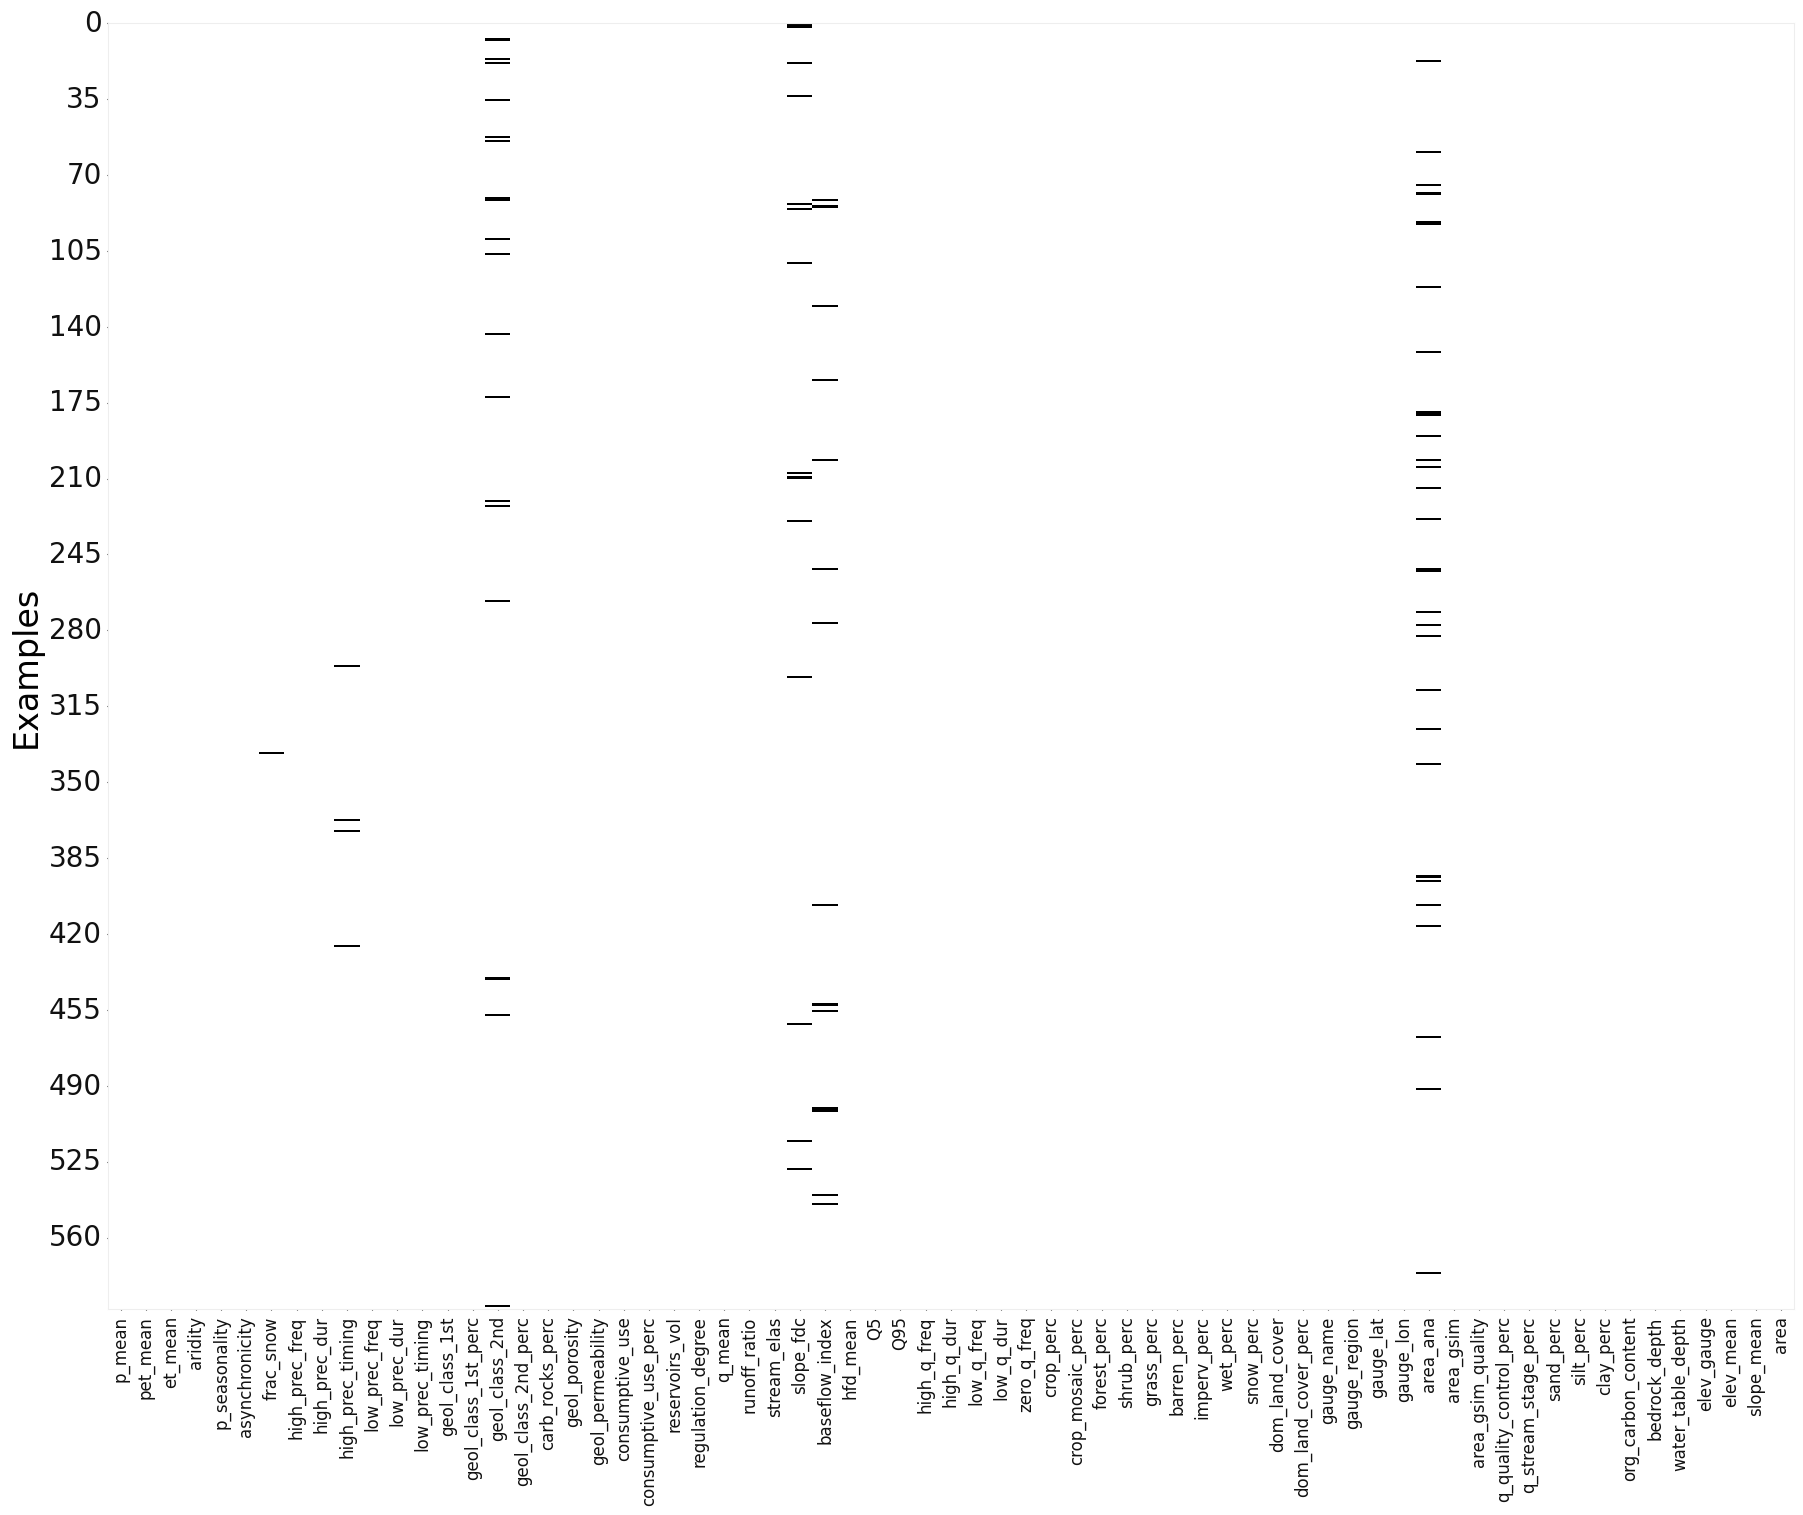

<AxesSubplot: ylabel='Examples'>

In [10]:
EDA(data=static, save=False).heatmap()

In [11]:
static = static.dropna(axis=1)
static.shape

(593, 61)

In [13]:
coords = dataset.stn_coords()
coords

lat     long
gauge_id                  
36020000  -6.3244 -40.1617
36045000  -6.6461 -39.9617
87270000 -29.7011 -51.4411
29100000  -5.4867 -49.2214
84071000 -27.4142 -48.9528
...           ...      ...
26350000 -11.6181 -50.6625
50380000 -10.8450 -40.1128
26720000 -12.4178 -49.5892
74700000 -27.6742 -54.4625
45880000 -13.5586 -44.3031

[593 rows x 2 columns]

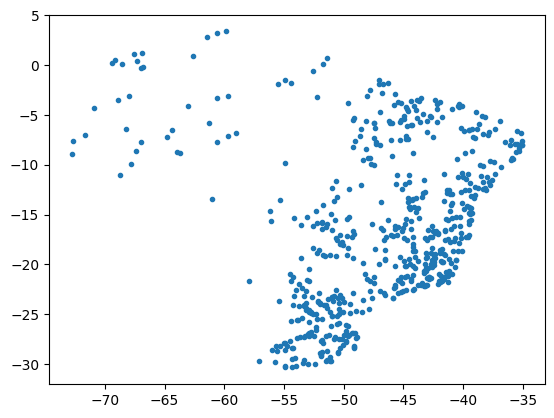

<AxesSubplot: >

In [14]:
dataset.plot_stations()

In [15]:
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)
height = static['elev_mean']
slope = static['slope_mean']


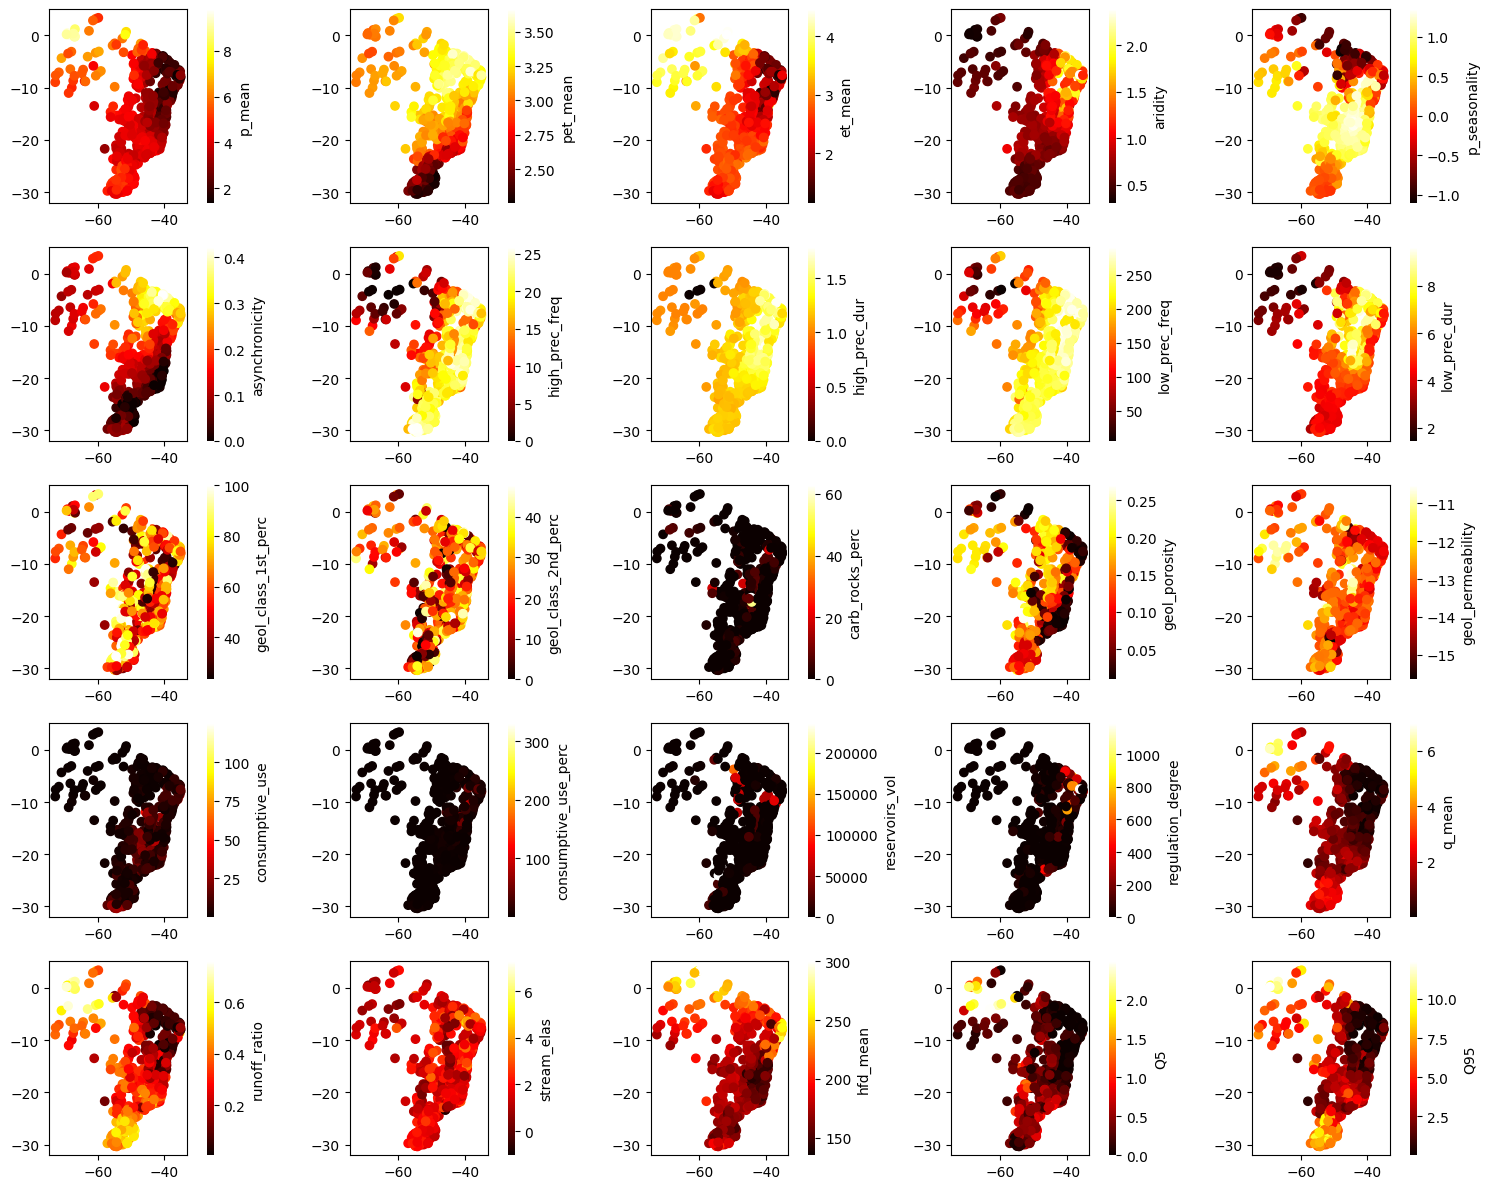

27


In [16]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    

plt.tight_layout()
plt.show()
print(idx)

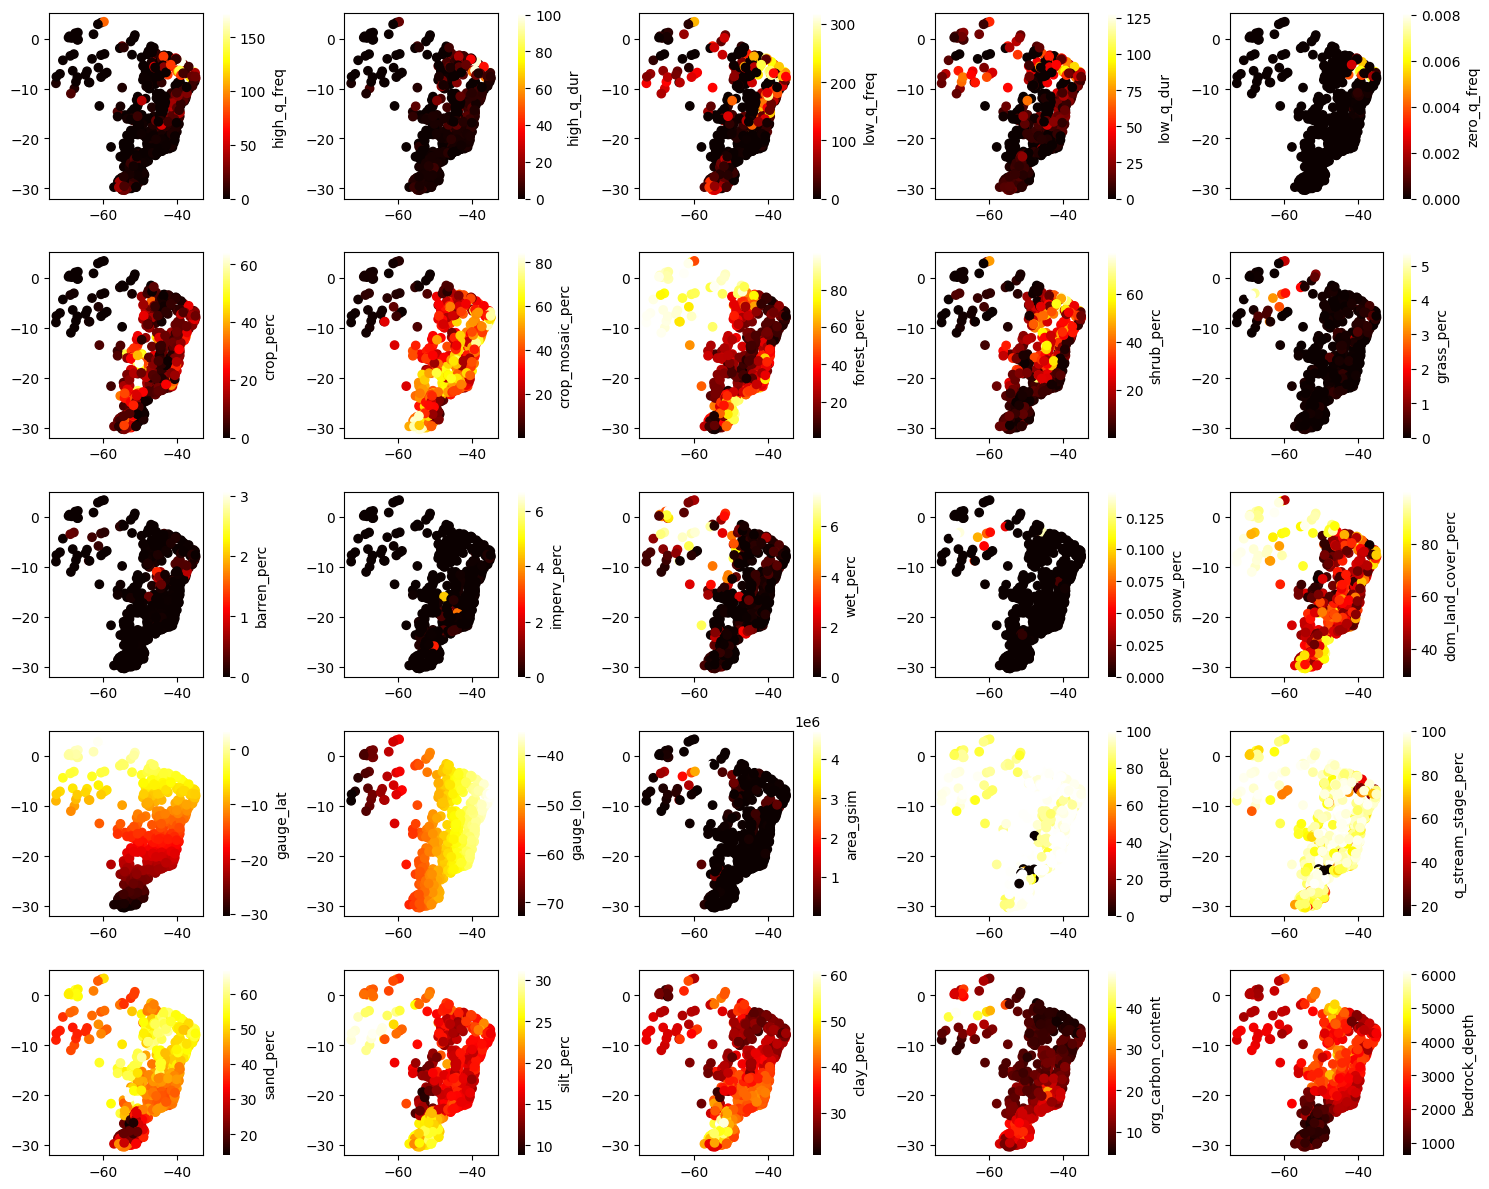

56


In [17]:
idx = 27
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    

plt.tight_layout()
plt.show()
print(idx)

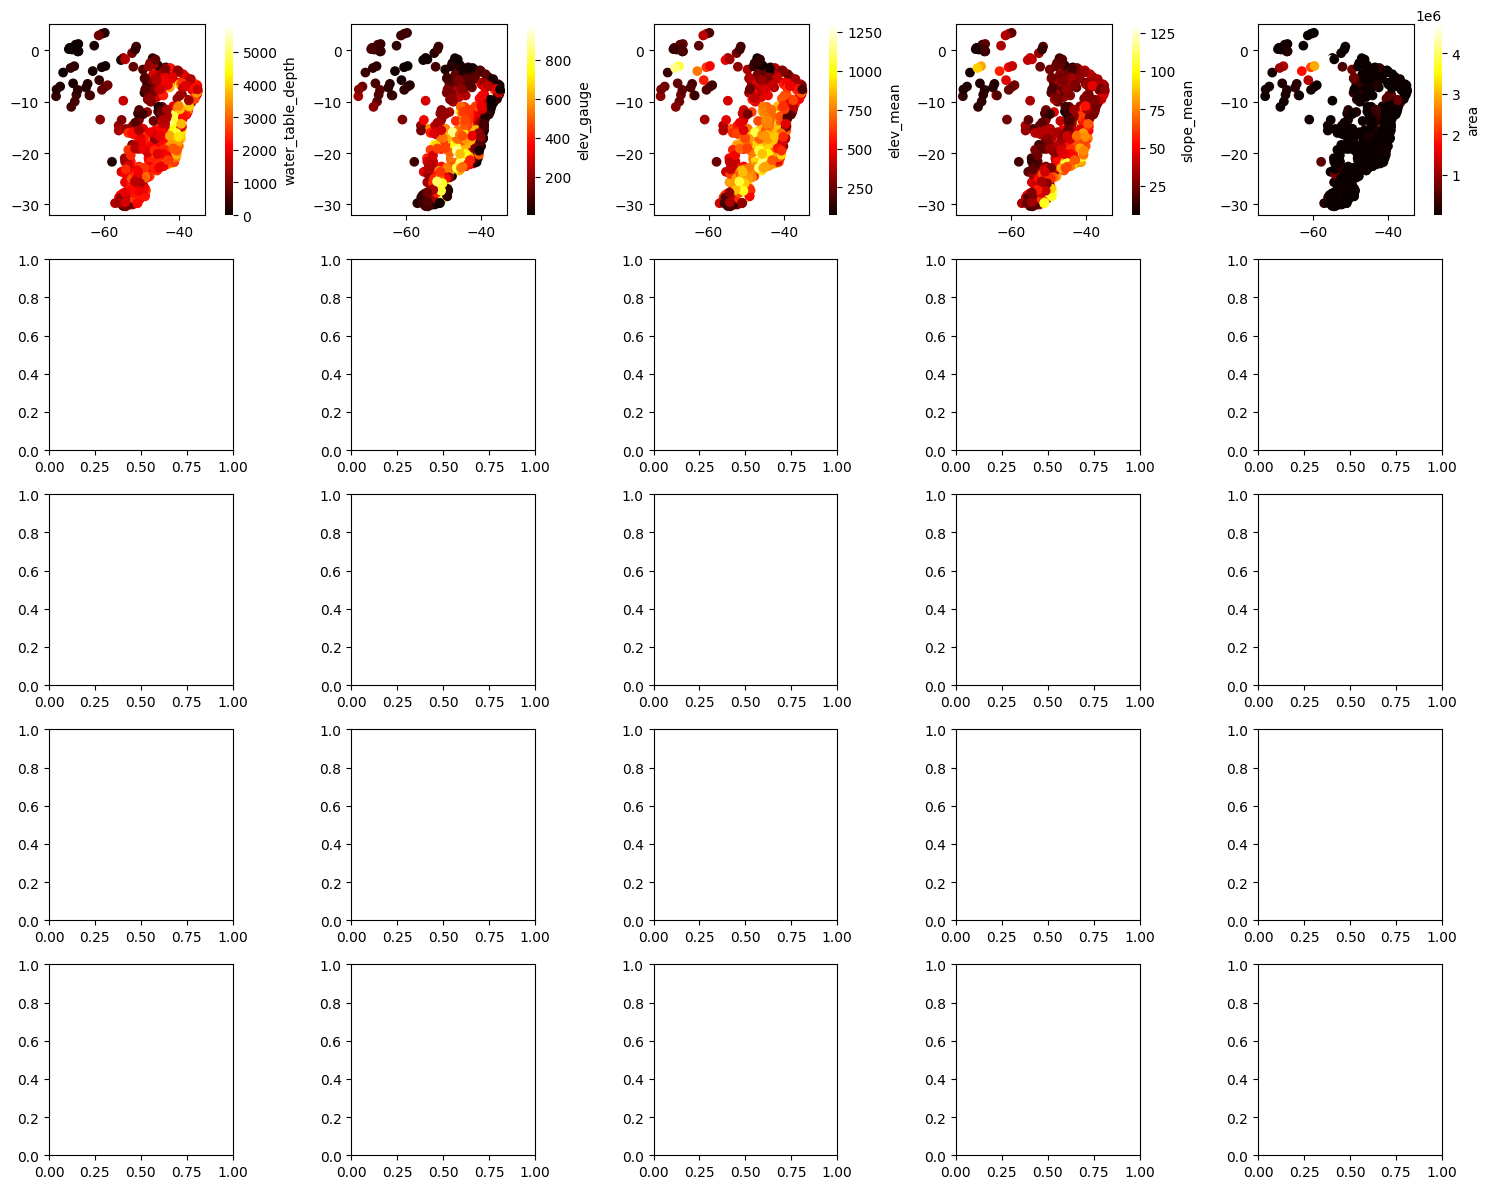

61


In [18]:
idx = 56
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    

plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [19]:
dataset.dynamic_features

['streamflow_m3s',
 'streamflow_mm',
 'simulated_streamflow_m3s',
 'precipitation_cpc',
 'precipitation_mswep',
 'precipitation_chirps',
 'evapotransp_gleam',
 'evapotransp_mgb',
 'potential_evapotransp_gleam',
 'temperature_min',
 'temperature_mean',
 'temperature_max']

In [20]:
# difference betwen different pcp ???
# meaning of gleam ???

#### Streamflow

In [22]:
streamflow = dataset.q_mmd()
print(streamflow.shape)


(14245, 593)


In [23]:
EDA(data=streamflow, save=False).heatmap()

<AxesSubplot: ylabel='Examples'>

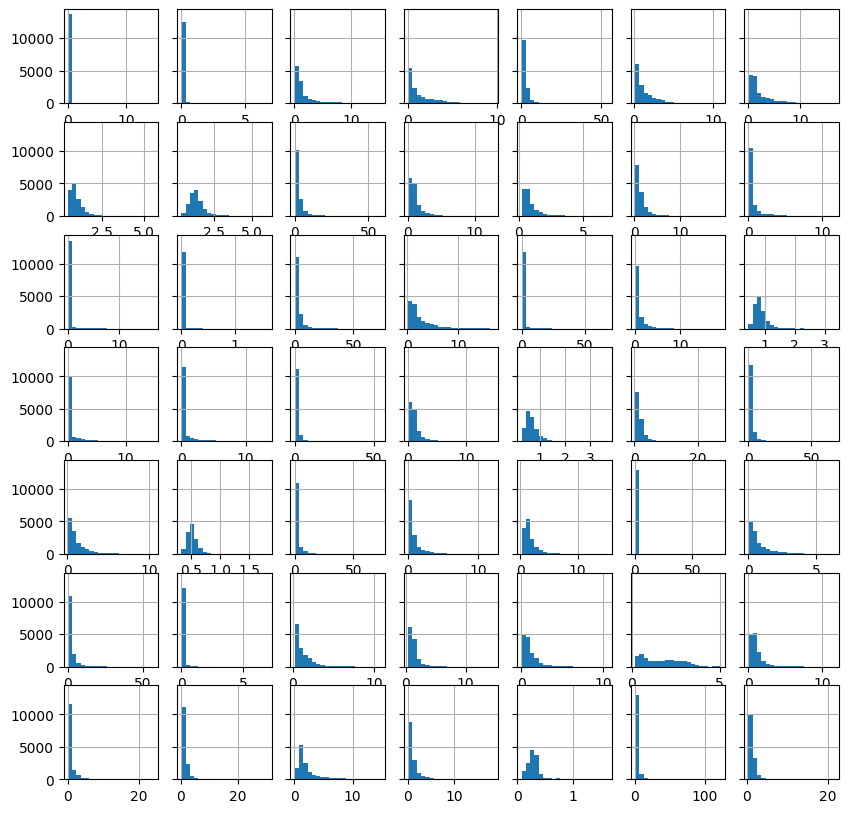

49


In [24]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

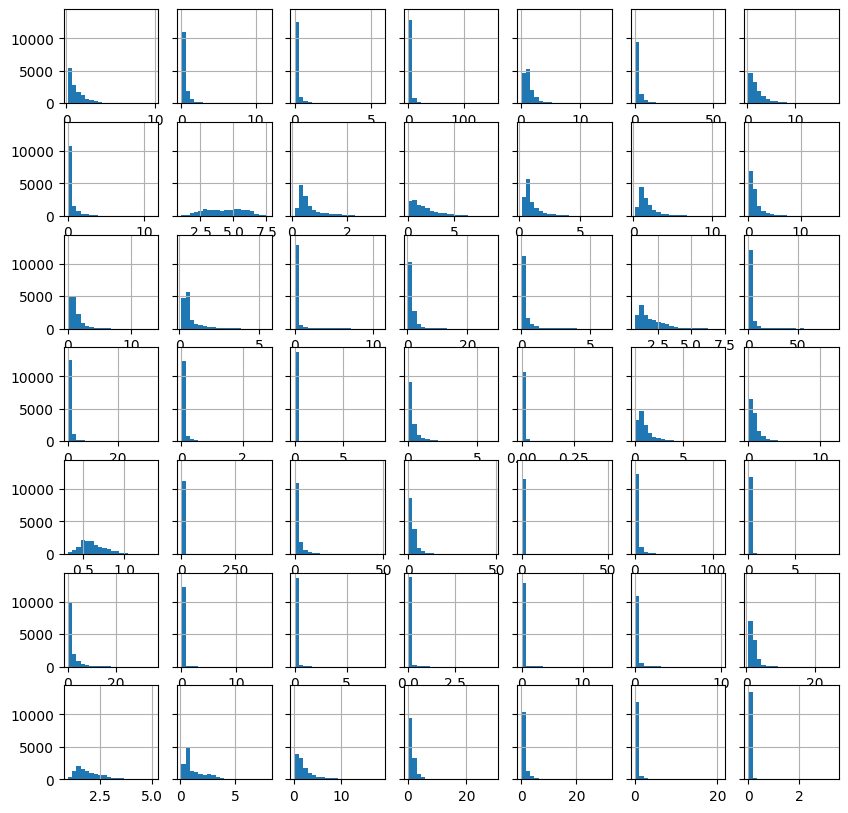

98


In [25]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

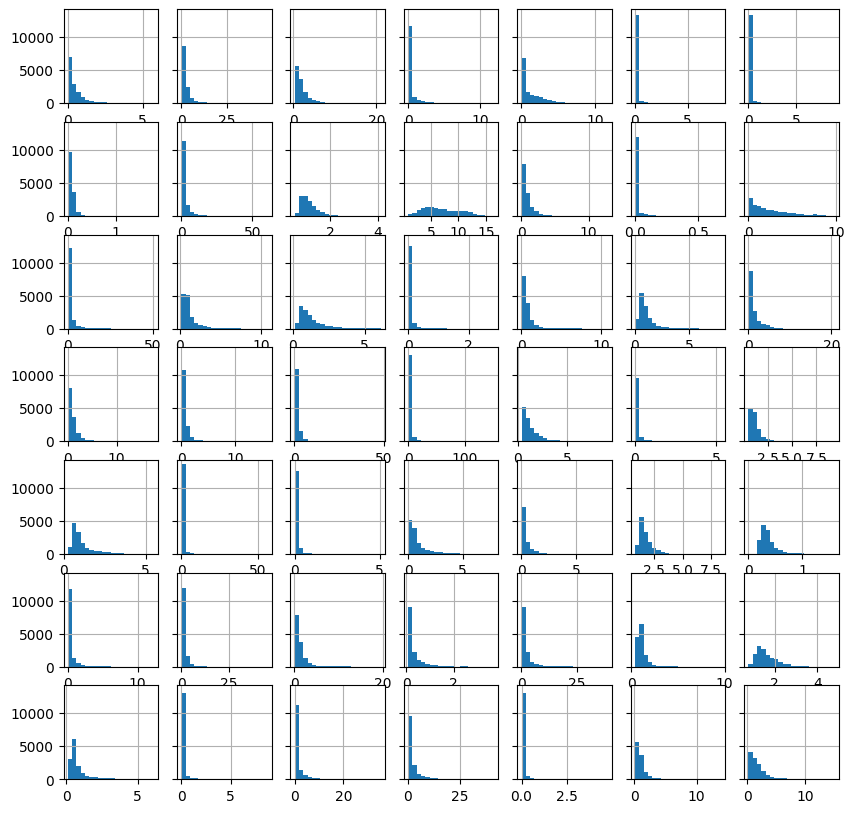

147


In [26]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

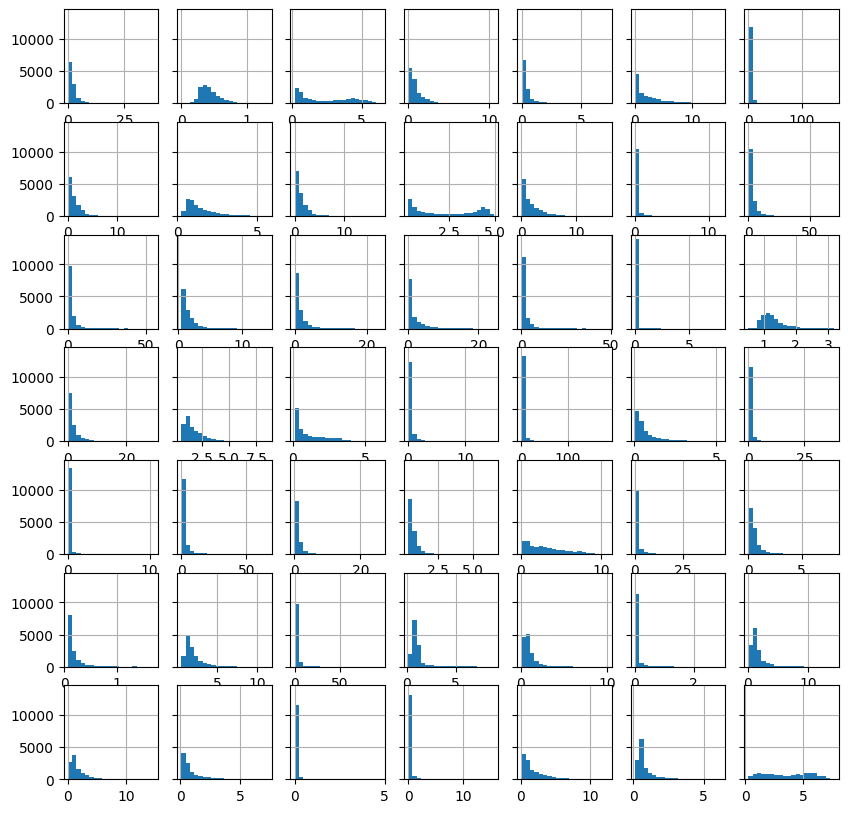

196


In [27]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

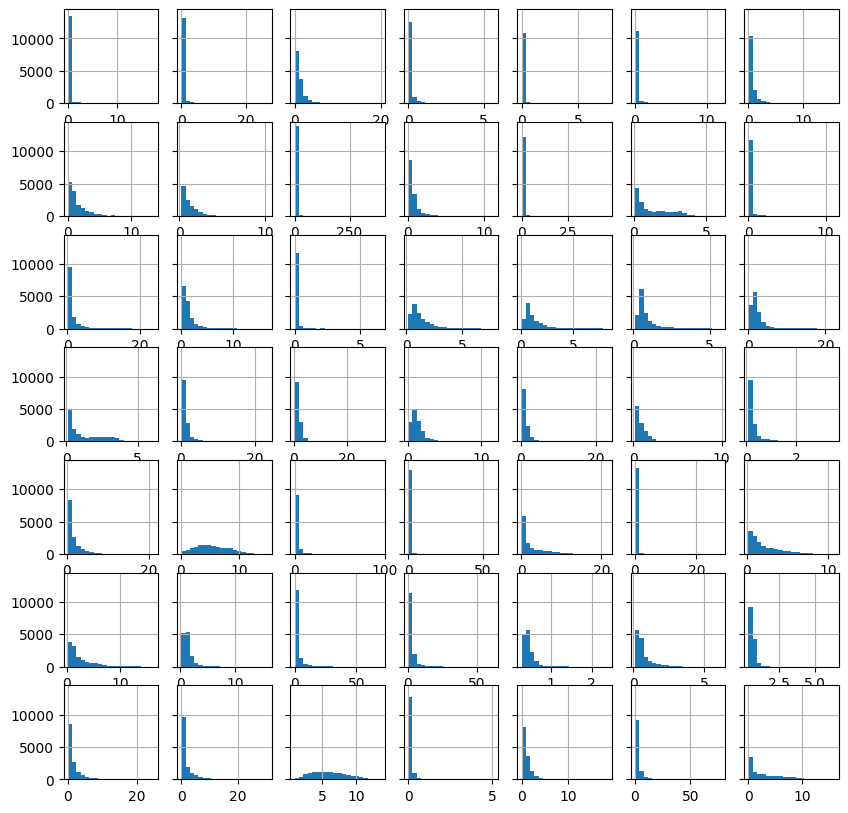

245


In [28]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

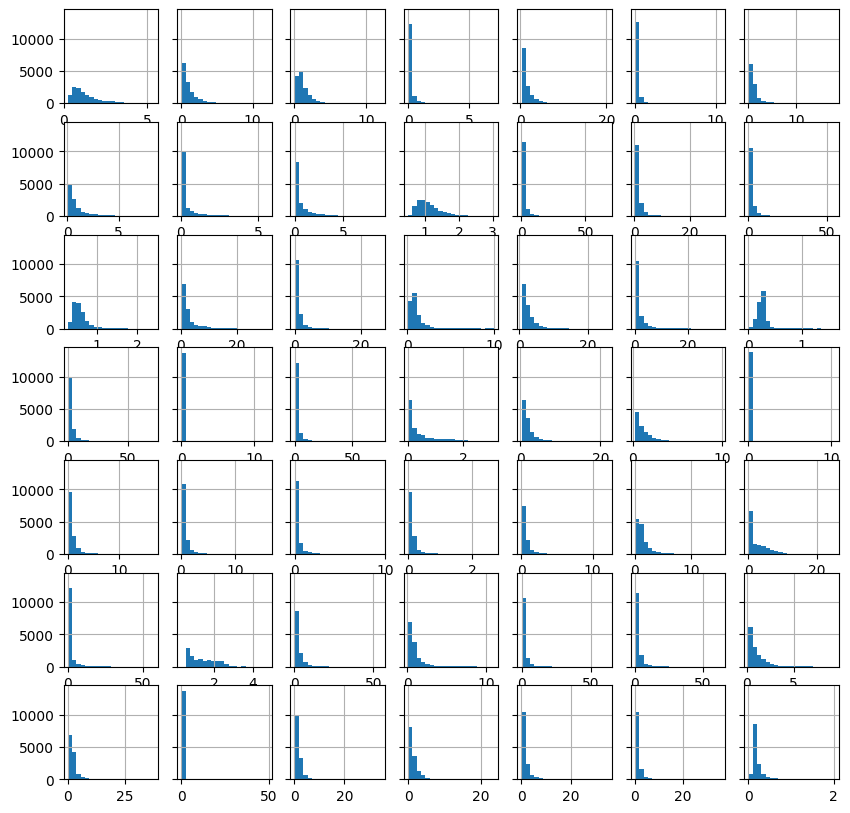

294


In [29]:
st = 245

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

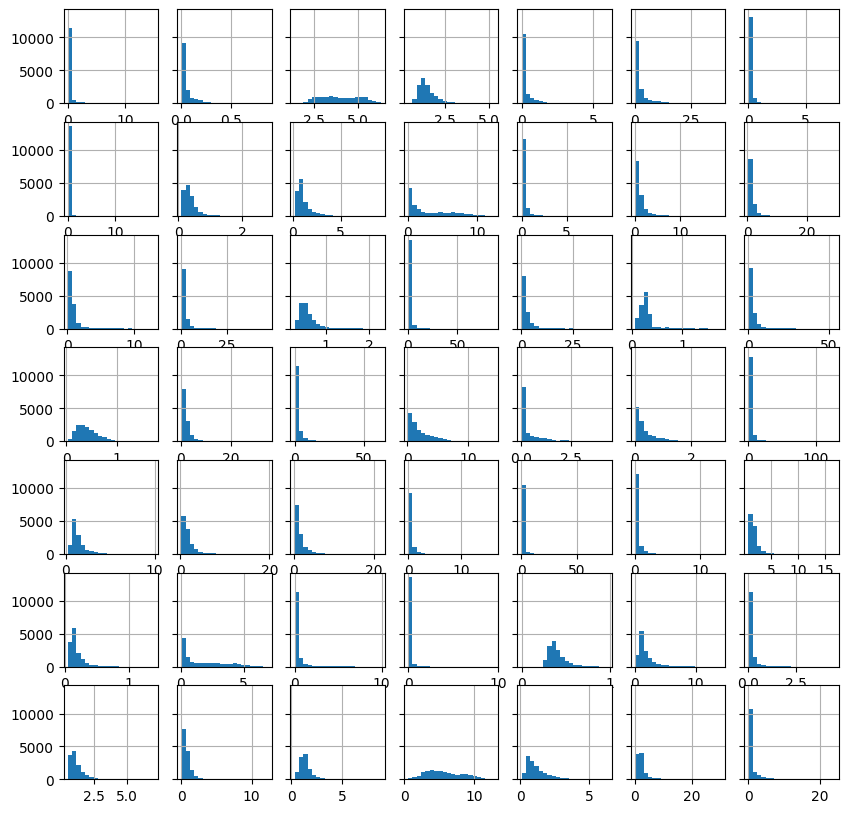

343


In [30]:
st = 294

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

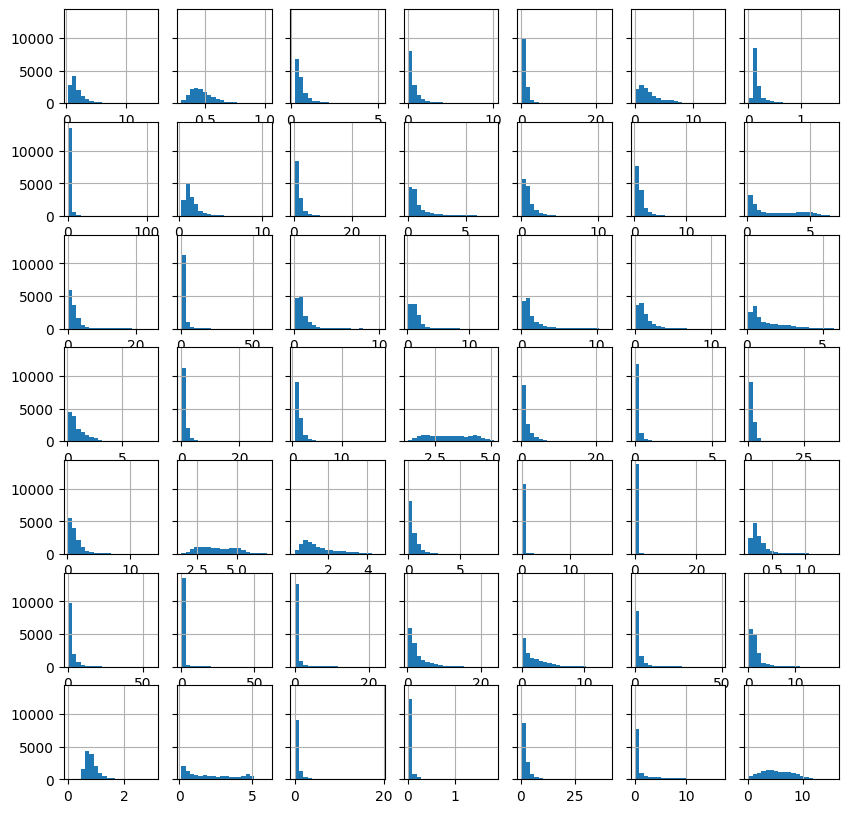

392


In [31]:
st = 343

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

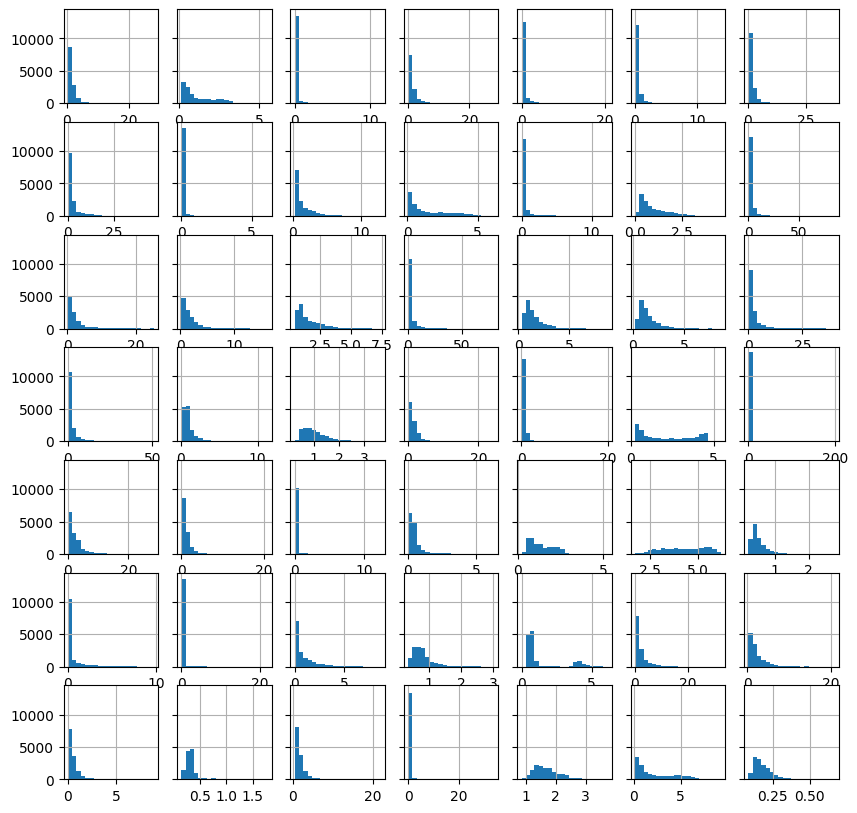

441


In [32]:
st = 392

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

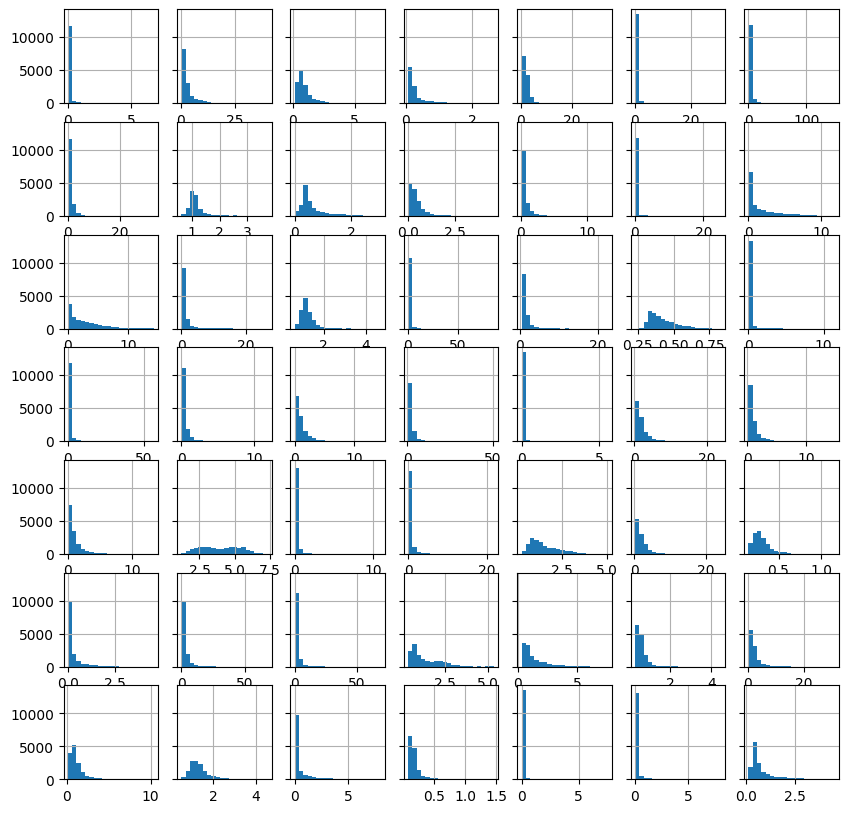

490


In [33]:
st = 441

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

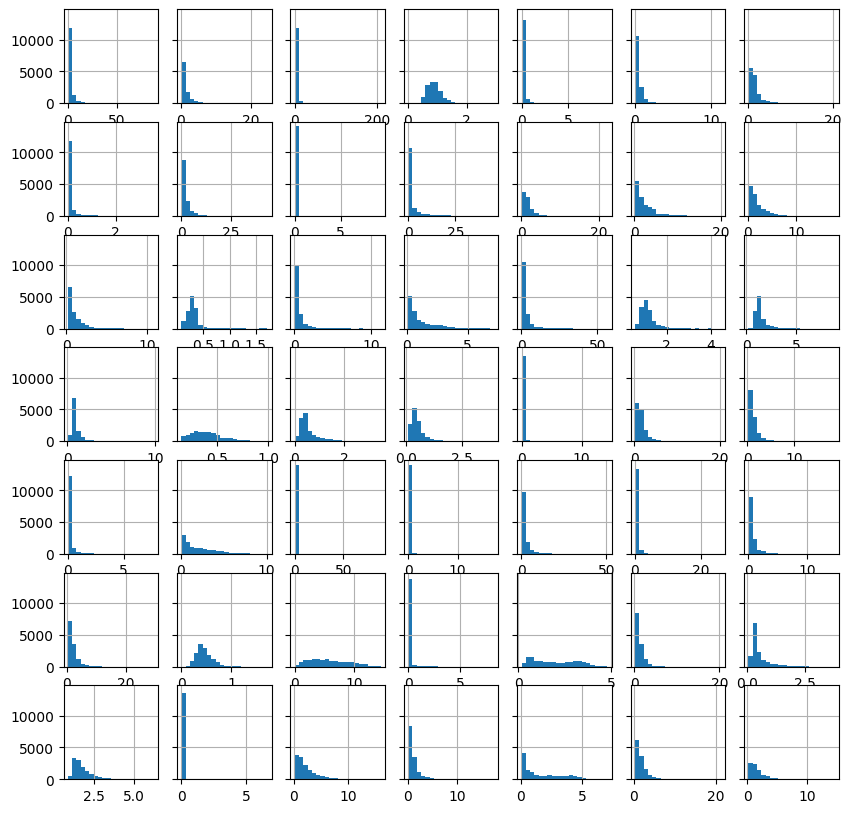

539


In [34]:
st = 490

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

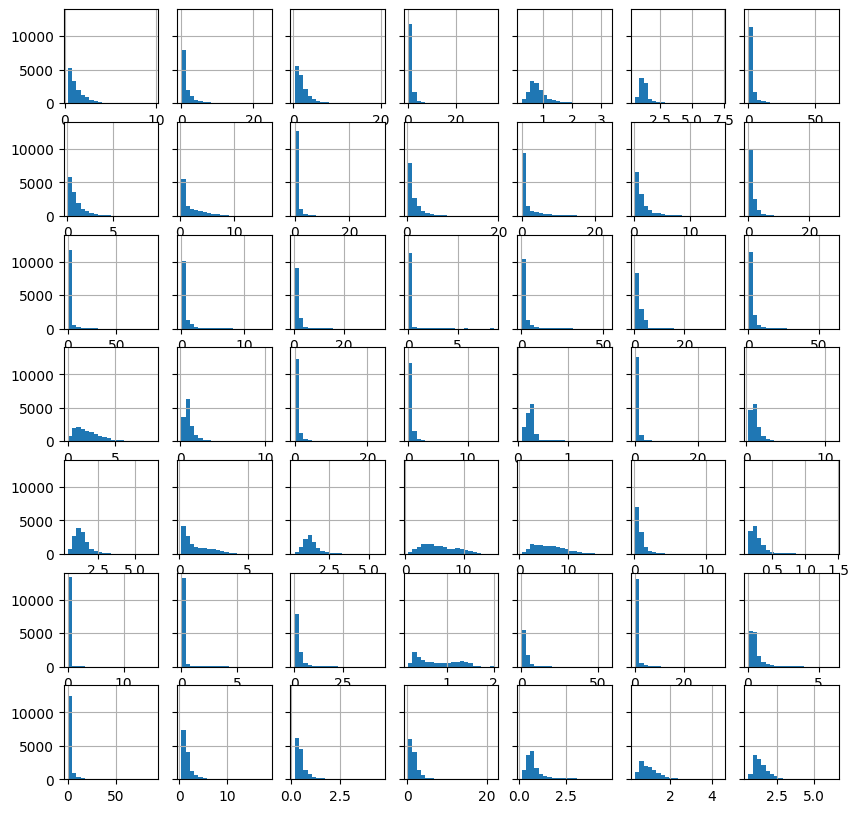

588


In [35]:
st = 539

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

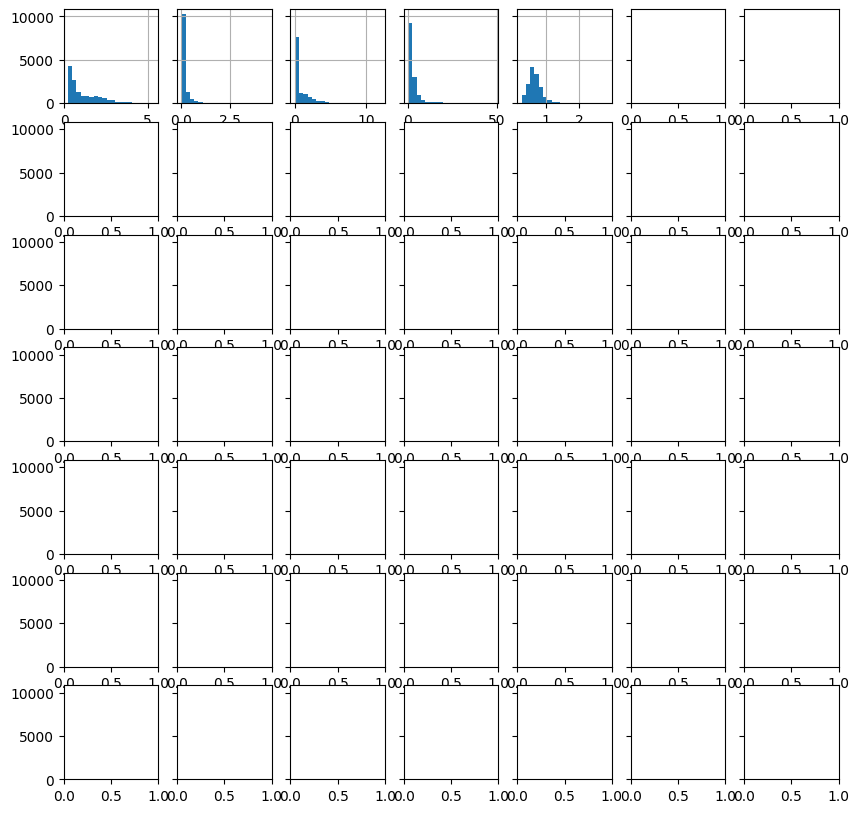

593


In [36]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = 588
for _, ax in enumerate(axes.flat):
    
    if idx>=593:
        break

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

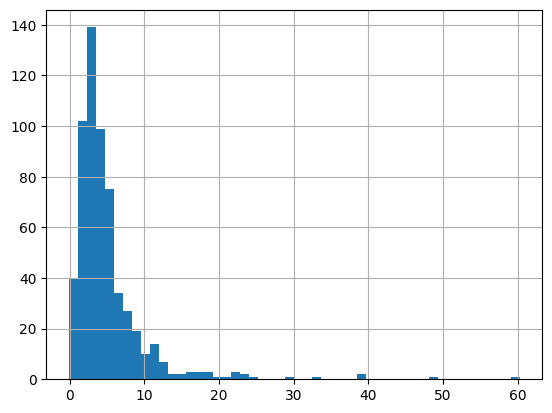

In [37]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### potential evapotranspiration

In [38]:
pet = dataset.fetch(dynamic_features = 'potential_evapotransp_gleam', as_dataframe=True)
pet = pet.reset_index()
pet.index = pd.to_datetime(pet.pop('time'))
pet.pop('dynamic_features')
print(pet.shape) 
EDA(data=pet, save=False).heatmap()

(14245, 593)


<AxesSubplot: ylabel='Examples'>

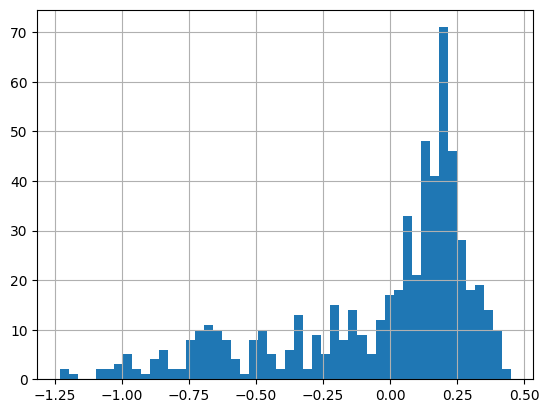

In [39]:
_ = hist(pet.skew().values.reshape(-1,), bins=50)

#### Air Temperature

In [40]:
temp = dataset.fetch(dynamic_features = 'temperature_mean', as_dataframe=True)
temp = temp.reset_index()
temp.index = pd.to_datetime(temp.pop('time'))
temp.pop('dynamic_features') 

print(temp.shape)

EDA(data=temp, save=False).heatmap()

(14245, 593)


<AxesSubplot: ylabel='Examples'>

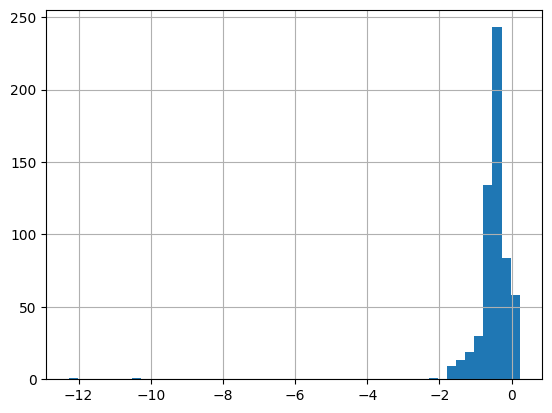

In [41]:

_ = hist(temp.skew().values.reshape(-1,), bins=50)

#### Precipitation


In [4]:
pcp = dataset.fetch(dynamic_features = 'precipitation_mswep', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

(14245, 593)


<AxesSubplot: ylabel='Examples'>

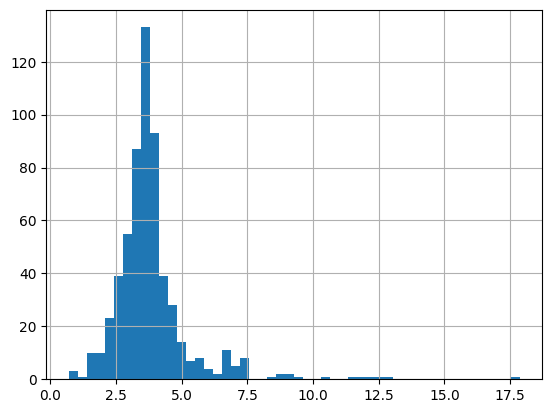

In [5]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)